## 코로나 확진자 연령별 비율 데이터프레임 만들기

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dbfread import DBF
from haversine import haversine
from tqdm.notebook import tqdm
%matplotlib inline
import platform
import pickle
import re
platform.system()
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'
!pip install dbfread
!pip install haversine

In [17]:
pop = pd.read_csv('./202008_202008_연령별인구현황_월간.csv', encoding='cp949')

In [18]:
pop

,행정구역,2020년08월_계_총인구수,2020년08월_계_연령구간인구수,2020년08월_계_0~9세,2020년08월_계_10~19세,2020년08월_계_20~29세,2020년08월_계_30~39세,2020년08월_계_40~49세,2020년08월_계_50~59세,2020년08월_계_60~69세,...,2020년08월_여_10~19세,2020년08월_여_20~29세,2020년08월_여_30~39세,2020년08월_여_40~49세,2020년08월_여_50~59세,2020년08월_여_60~69세,2020년08월_여_70~79세,2020년08월_여_80~89세,2020년08월_여_90~99세,2020년08월_여_100세 이상
0,전국 (0000000000),"51,839,953","51,839,953","4,045,950","4,838,700","6,800,612","6,939,804","8,330,276","8,651,547","6,590,179",...,"2,335,088","3,228,579","3,365,975","4,098,433","4,285,991","3,367,793","2,024,828","1,104,141","190,664","16,208"
1,서울특별시 (1100000000),"9,708,247","9,708,247","639,596","794,131","1,465,467","1,490,070","1,542,023","1,529,802","1,225,960",...,"386,919","753,239","744,475","778,250","778,684","647,009","381,473","166,779","30,839","4,888"
2,부산광역시 (2600000000),"3,401,072","3,401,072","236,814","274,958","433,203","425,362","513,686","573,461","522,542",...,"132,791","207,149","207,944","255,318","295,348","274,897","160,303","72,449","11,566","1,454"
3,대구광역시 (2700000000),"2,428,228","2,428,228","182,168","228,864","323,345","299,184","386,857","427,501","319,802",...,"109,262","150,231","143,922","196,049","218,187","167,561","98,316","49,578","7,130",542
4,인천광역시 (2800000000),"2,943,491","2,943,491","233,407","275,994","402,504","409,809","485,648","513,155","357,885",...,"134,072","192,600","197,958","237,494","256,501","180,531","95,949","50,002","9,461",684
5,광주광역시 (2900000000),"1,454,154","1,454,154","122,309","159,172","209,096","188,454","243,152","233,774","160,460",...,"76,553","99,932","92,323","122,524","117,867","84,049","51,541","25,421","4,503",370
6,대전광역시 (3000000000),"1,469,431","1,469,431","117,415","148,434","212,919","196,687","239,441","242,755","175,168",...,"71,634","101,166","94,264","120,142","121,675","89,997","49,502","25,653","4,447",276
7,울산광역시 (3100000000),"1,140,310","1,140,310","100,818","113,185","145,980","154,757","188,931","210,425","141,600",...,"53,562","64,043","72,693","92,889","103,202","70,176","31,163","14,990","2,540",134
8,세종특별자치시 (3600000000),"347,232","347,232","46,987","41,416","36,241","60,795","66,950","43,814","28,836",...,"20,639","17,879","31,162","32,713","21,031","14,543","7,602","4,622",902,45
9,경기도 (4100000000),"13,370,714","13,370,714","1,161,588","1,338,833","1,795,440","1,912,042","2,297,528","2,223,814","1,486,778",...,"649,584","850,530","927,606","1,130,482","1,096,137","748,114","415,057","217,539","38,688","3,093"


In [35]:
ppl_ = list(pop.iloc[0][3:14])
ppl = []
for i in ppl_:
    ppl.append(int(re.sub(',', '', i)))
ppl = ppl[:-3] + [sum(ppl[-3:])]
ppl

[4045950,
 4838700,
 6800612,
 6939804,
 8330276,
 8651547,
 6590179,
 3676849,
 1966036]

In [37]:
age_list = ['0s','10s','20s','30s','40s','50s','60s','70s','80s']
per = [10.99, 23.52, 63.84, 35.70, 32.39, 42.51, 47.49, 41.42, 41.91]
population = ppl

In [38]:
k = pd.DataFrame(data={'연령':age_list, '인구10만명 당 발생률':per, '연령별 인구 수':population })
k

,연령,인구10만명 당 발생률,연령별 인구 수
0,0s,10.99,4045950
1,10s,23.52,4838700
2,20s,63.84,6800612
3,30s,35.70,6939804
4,40s,32.39,8330276
5,50s,42.51,8651547
6,60s,47.49,6590179
7,70s,41.42,3676849
8,80s,41.91,1966036


# 인구 10만명 당 코로나 확진자 발생 그래프, 인구분포 그래프

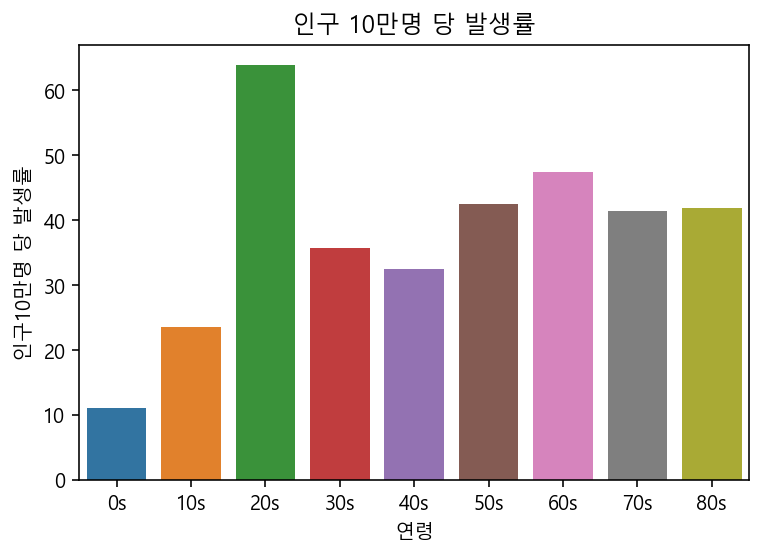

In [43]:
sns.barplot(
    data= k,
    x= "연령",
    y= "인구10만명 당 발생률"
)
plt.title('인구 10만명 당 발생률')
plt.show()

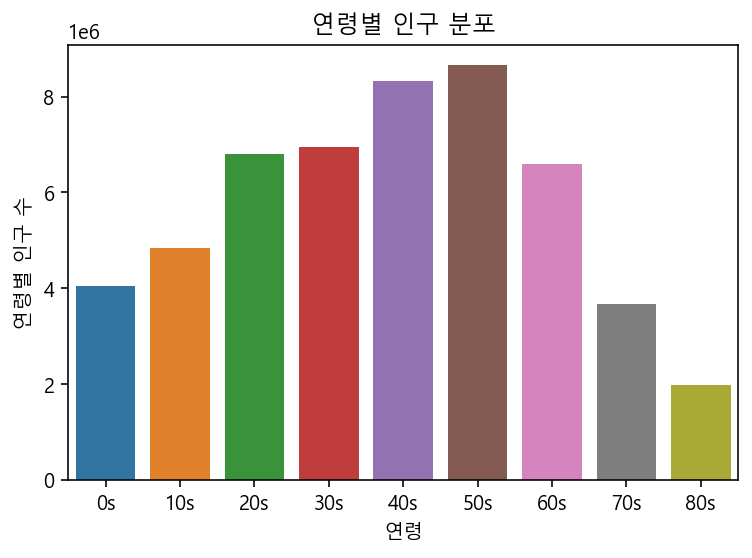

In [44]:
sns.barplot(
    data= k,
    x= "연령",
    y= "연령별 인구 수"
)
plt.title('연령별 인구 분포')
plt.show()